In [213]:
import os
import pandas as pd

def get_parquet_files(root_folder):
    parquet_files = []
    for root, dirs, files in os.walk(root_folder):
        for file in files:
            if file.endswith(".parquet"):
                parquet_files.append(os.path.join(root, file))
    return parquet_files

root_folder = '../test/'
parquet_files = get_parquet_files(root_folder)
print(parquet_files)
df = pd.concat([pd.read_parquet(parquet_file) for parquet_file in parquet_files])

df.head()

['../test/order_datetime=2021-10-19/part-00003-b265e002-bffa-4201-a2a4-590ab25f4477.c000.snappy.parquet', '../test/order_datetime=2022-09-01/part-00005-bd1de064-b854-4ca3-9886-c1f7ca24ac73.c000.snappy.parquet', '../test/order_datetime=2021-08-12/part-00001-cfff5211-ef46-4b99-a6ed-63c9b2c7fe15.c000.snappy.parquet', '../test/order_datetime=2021-10-26/part-00003-b265e002-bffa-4201-a2a4-590ab25f4477.c000.snappy.parquet', '../test/order_datetime=2021-08-15/part-00001-cfff5211-ef46-4b99-a6ed-63c9b2c7fe15.c000.snappy.parquet', '../test/order_datetime=2022-09-06/part-00005-bd1de064-b854-4ca3-9886-c1f7ca24ac73.c000.snappy.parquet', '../test/order_datetime=2021-10-21/part-00003-b265e002-bffa-4201-a2a4-590ab25f4477.c000.snappy.parquet', '../test/order_datetime=2022-09-30/part-00005-bd1de064-b854-4ca3-9886-c1f7ca24ac73.c000.snappy.parquet', '../test/order_datetime=2021-08-23/part-00001-cfff5211-ef46-4b99-a6ed-63c9b2c7fe15.c000.snappy.parquet', '../test/order_datetime=2021-10-28/part-00003-b265e002

,user_id,merchant_abn,dollar_value,order_id
0,14938,19933438190,28.197762,9ac44c8f-815e-4a5d-817c-74ac53327afa
1,1,80324045558,19.917432,2c7b1606-d9f1-4eac-99f8-97abc979ab41
2,14938,50315283629,88.556866,18507390-268c-4dee-8d19-22c4cdf72b58
3,1,62170730910,100.929076,4fe7b08f-72bd-42fb-b2ae-407c3249de55
4,14938,20527255332,205.822861,d1c2a45c-c0e2-4d25-9054-36c945b9a225


In [214]:
merchants = pd.read_parquet('../data/raw/tbl_merchants.parquet')
merchants.reset_index(inplace=True)
merchants.head()

,merchant_abn,name,tags
0,10023283211,Felis Limited,"((furniture, home furnishings and equipment sh..."
1,10142254217,Arcu Ac Orci Corporation,"([cable, satellite, and otHer pay television a..."
2,10165489824,Nunc Sed Company,"([jewelry, watch, clock, and silverware shops]..."
3,10187291046,Ultricies Dignissim Lacus Foundation,"([wAtch, clock, and jewelry repair shops], [b]..."
4,10192359162,Enim Condimentum PC,"([music shops - musical instruments, pianos, a..."


In [215]:
consumers = pd.read_parquet('../data/raw/consumer_user_details.parquet')
consumers.head()

,user_id,consumer_id
0,1,1195503
1,2,179208
2,3,1194530
3,4,154128
4,5,712975


In [219]:
merchant_fraud = pd.read_csv('../data/raw/merchant_fraud_probability.csv')
merchant_fraud.head()

,merchant_abn,order_datetime,fraud_probability
0,19492220327,2021-11-28,44.403659
1,31334588839,2021-10-02,42.755301
2,19492220327,2021-12-22,38.867790
3,82999039227,2021-12-19,94.134700
4,90918180829,2021-09-02,43.325517


In [199]:
import pandas as pd

def split_tags(tag):
    if isinstance(tag, str):
        tag = tag.replace('(', '[').replace(')', ']')
        parts = tag.split('], [')
        
        parts = [p.strip('[]') for p in parts]
        
        if len(parts) == 3:
            category = parts[0].strip()
            revenue_rate = parts[1].strip()
            take_rate = parts[2].strip()
            return category, revenue_rate, take_rate
    return None, None, None

merchants[['category', 'revenue_rate', 'take_rate']] = merchants['tags'].apply(lambda x: pd.Series(split_tags(x)))

merchants.drop(columns=['tags'], inplace=True)

print(merchants.head())
# Print the column names of the merchants DataFrame
print(merchants.columns)


   merchant_abn                                  name  \
0   10023283211                         Felis Limited   
1   10142254217              Arcu Ac Orci Corporation   
2   10165489824                      Nunc Sed Company   
3   10187291046  Ultricies Dignissim Lacus Foundation   
4   10192359162                   Enim Condimentum PC   

                                            category revenue_rate  \
0  furniture, home furnishings and equipment shop...            e   
1  cable, satellite, and otHer pay television and...            b   
2        jewelry, watch, clock, and silverware shops            b   
3             wAtch, clock, and jewelry repair shops            b   
4  music shops - musical instruments, pianos, and...            a   

         take_rate  
0  take rate: 0.18  
1  take rate: 4.22  
2  take rate: 4.40  
3  take rate: 3.29  
4  take rate: 6.33  
Index(['merchant_abn', 'name', 'category', 'revenue_rate', 'take_rate'], dtype='object')


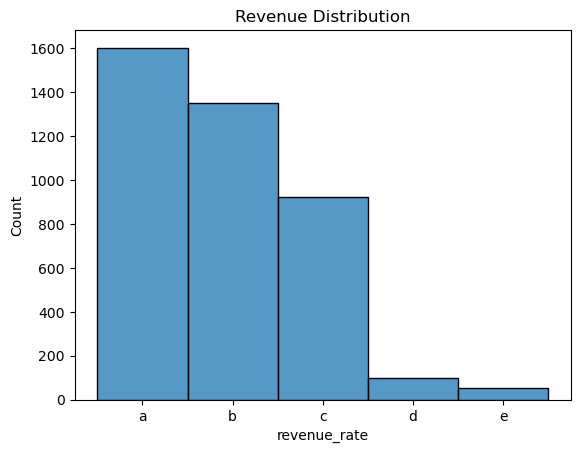

merchant_abn    0
name            0
category        0
revenue_rate    0
take_rate       0
dtype: int64
user_id         0
merchant_abn    0
dollar_value    0
order_id        0
dtype: int64
user_id        0
consumer_id    0
dtype: int64


In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

merchants_sorted = merchants.sort_values('revenue_rate')
sns.histplot(merchants_sorted['revenue_rate'], bins=20)
plt.title('Revenue Distribution')
plt.show()

print(merchants.isnull().sum())
print(df.isnull().sum())
print(consumers.isnull().sum())

In [220]:
merged_merchants = merchants.merge(merchant_fraud, on='merchant_abn', how='left')
merged_merchants.drop(columns=['order_datetime'], inplace=True)
merged_merchants['fraud_probability'].fillna(0, inplace=True)

print(merged_merchants.head())

   merchant_abn                                  name  \
0   10023283211                         Felis Limited   
1   10142254217              Arcu Ac Orci Corporation   
2   10165489824                      Nunc Sed Company   
3   10187291046  Ultricies Dignissim Lacus Foundation   
4   10192359162                   Enim Condimentum PC   

                                                tags  fraud_probability  
0  ((furniture, home furnishings and equipment sh...                0.0  
1  ([cable, satellite, and otHer pay television a...                0.0  
2  ([jewelry, watch, clock, and silverware shops]...                0.0  
3  ([wAtch, clock, and jewelry repair shops], [b]...                0.0  
4  ([music shops - musical instruments, pianos, a...                0.0  


/var/folders/v2/2k5fqnzj1y709v_5_qh65lfw0000gn/T/ipykernel_5039/691383581.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_merchants['fraud_probability'].fillna(0, inplace=True)


In [202]:
null_counts = merged_merchants.isnull().sum()
non_null_counts = merged_merchants.notnull().sum()

print("Null Count:")
print(null_counts)
print("\nNon-Null Count:")
print(non_null_counts)

Null Count:
merchant_abn         0
name                 0
category             0
revenue_rate         0
take_rate            0
fraud_probability    0
dtype: int64

Non-Null Count:
merchant_abn         4073
name                 4073
category             4073
revenue_rate         4073
take_rate            4073
fraud_probability    4073
dtype: int64


In [221]:
frauddf = pd.read_csv('../data/raw/consumer_fraud_probability.csv')
consumerdf = pd.read_csv('../data/raw/tbl_consumer.csv', delimiter='|')
userdf = pd.read_parquet('../data/raw/consumer_user_details.parquet')
mergeddf1 = consumerdf.merge(userdf, on='consumer_id', how='left')
mdf = mergeddf1.merge(frauddf, on='user_id', how='left')

mdf.drop(columns=['order_datetime'], inplace=True)

mdf['fraud_probability'].fillna(0, inplace=True)

print(mdf.head(20))

                 name                        address state  postcode  \
0    Yolanda Williams     413 Haney Gardens Apt. 742    WA      6935   
1          Mary Smith                3764 Amber Oval   NSW      2782   
2          Mary Smith                3764 Amber Oval   NSW      2782   
3       Jill Jones MD             40693 Henry Greens    NT       862   
4     Lindsay Jimenez      00653 Davenport Crossroad   NSW      2780   
5   Rebecca Blanchard  9271 Michael Manors Suite 651    WA      6355   
6   Rebecca Blanchard  9271 Michael Manors Suite 651    WA      6355   
7   Rebecca Blanchard  9271 Michael Manors Suite 651    WA      6355   
8       Karen Chapman    2706 Stewart Oval Suite 588   NSW      2033   
9        Andrea Jones              122 Brandon Cliff   QLD      4606   
10   Stephen Williams    6804 Wright Crest Suite 311    WA      6056   
11    Stephanie Reyes     5813 Denise Land Suite 690   NSW      2482   
12    Stephanie Reyes     5813 Denise Land Suite 690   NSW      

/var/folders/v2/2k5fqnzj1y709v_5_qh65lfw0000gn/T/ipykernel_5039/4008291892.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mdf['fraud_probability'].fillna(0, inplace=True)


In [204]:
null_counts = mdf.isnull().sum()

non_null_counts = mdf.notnull().sum()

print("Null Counts:")
print(null_counts)
print("\nNon-Null Counts:")
print(non_null_counts)
print(mdf.columns)

Null Counts:
name                 0
address              0
state                0
postcode             0
gender               0
consumer_id          0
user_id              0
fraud_probability    0
dtype: int64

Non-Null Counts:
name                 514735
address              514735
state                514735
postcode             514735
gender               514735
consumer_id          514735
user_id              514735
fraud_probability    514735
dtype: int64
Index(['name', 'address', 'state', 'postcode', 'gender', 'consumer_id',
       'user_id', 'fraud_probability'],
      dtype='object')


In [205]:
mdf.head()

,name,address,state,postcode,gender,consumer_id,user_id,fraud_probability
0,Yolanda Williams,413 Haney Gardens Apt. 742,WA,6935,Female,1195503,1,9.805431
1,Mary Smith,3764 Amber Oval,NSW,2782,Female,179208,2,10.069851
2,Mary Smith,3764 Amber Oval,NSW,2782,Female,179208,2,9.599514
3,Jill Jones MD,40693 Henry Greens,NT,862,Female,1194530,3,8.300636
4,Lindsay Jimenez,00653 Davenport Crossroad,NSW,2780,Female,154128,4,9.633302


In [208]:
import numpy as np
from scipy.stats import zscore

df_cleaned = df[df['dollar_value'] >= 5]

df_cleaned['z_score'] = zscore(df_cleaned['dollar_value'])

threshold = np.sqrt(2 * np.log1p(len(df_cleaned)))

df_cleaned = df_cleaned[df_cleaned['z_score'].abs() <= threshold]

df_cleaned.drop(columns=['z_score'], inplace=True)

df_cleaned.head()

/var/folders/v2/2k5fqnzj1y709v_5_qh65lfw0000gn/T/ipykernel_5039/3929449767.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['z_score'] = zscore(df_cleaned['dollar_value'])


,user_id,merchant_abn,dollar_value,order_id
0,14938,19933438190,28.197762,9ac44c8f-815e-4a5d-817c-74ac53327afa
1,1,80324045558,19.917432,2c7b1606-d9f1-4eac-99f8-97abc979ab41
2,14938,50315283629,88.556866,18507390-268c-4dee-8d19-22c4cdf72b58
3,1,62170730910,100.929076,4fe7b08f-72bd-42fb-b2ae-407c3249de55
4,14938,20527255332,205.822861,d1c2a45c-c0e2-4d25-9054-36c945b9a225


In [222]:
# merge mdf and df on user_id 
merged_df = mdf.merge(df, on='user_id', how='left')

In [211]:
merged_df.head()

,name,address,state,postcode,gender,consumer_id,user_id,fraud_probability,merchant_abn,dollar_value,order_id
0,Yolanda Williams,413 Haney Gardens Apt. 742,WA,6935,Female,1195503,1,9.805431,8.032405e+10,19.917432,2c7b1606-d9f1-4eac-99f8-97abc979ab41
1,Yolanda Williams,413 Haney Gardens Apt. 742,WA,6935,Female,1195503,1,9.805431,6.217073e+10,100.929076,4fe7b08f-72bd-42fb-b2ae-407c3249de55
2,Yolanda Williams,413 Haney Gardens Apt. 742,WA,6935,Female,1195503,1,9.805431,3.270955e+10,238.927870,9c5555a5-3e2a-48d3-9b5c-4e54efaf0b67
3,Yolanda Williams,413 Haney Gardens Apt. 742,WA,6935,Female,1195503,1,9.805431,7.401924e+10,5.228331,9138e9c7-3c1a-40da-83dc-8bbe3e14e2cc
4,Yolanda Williams,413 Haney Gardens Apt. 742,WA,6935,Female,1195503,1,9.805431,6.733018e+10,144.059911,3f958037-236e-430d-ab86-a1e514dc2584


In [212]:
# export the merged_df to a parquet file
merged_df.to_parquet('../data/curated/consumer_merged.parquet')

ArrowInvalid: ("Could not convert '0' with type str: tried to convert to double", 'Conversion failed for column fraud_probability with type object')